In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In cricket, a batsman's batting position is an indicator of how good a batsman is. In every inning, a batsman has his own unique batting position. The task here is to assign this batting position to each batsman in an inning accordingly.

Expected Submission
The submission must be a dataset created with the help of Python/R with columns indicating the Match ID, Inning, and all batsmen with their own batting posiiton.
Create a Fantasy IPL Dream Team

Task Details
Cricket contains some really good batting and bowling statistics which indicate a player's performance in a match, season or just his whole career. Tweak these statistics using the dataset and create a fantasy dream team for the whole tournament and one for just the 2020 season.


In [61]:
from zipfile import ZipFile 
  
# specifying the zip file name 
file_name = "IPL_2020.zip"
  
    
# opening the zip file in READ mode 
with ZipFile("IPL_2020.zip", 'r') as zip: 
    # printing all the contents of the zip file 
    zip.printdir() 
  
    # extracting all the files 
    print('Extracting all the files now...') 
    zip.extractall() 
    print('Done!') 

File Name                                             Modified             Size
batsman-stats.xlsx                             2020-11-16 11:24:32        34857
bowler-stats.xlsx                              2020-11-16 11:24:32        34239
points-table.xlsx                              2020-11-16 11:24:32        13264
team-players.xlsx                              2020-11-16 11:24:32        22888
Extracting all the files now...
Done!


In [62]:
batsman=pd.read_excel('batsman-stats.xlsx')
bowler=pd.read_excel('bowler-stats.xlsx')
points_table=pd.read_excel('points-table.xlsx')
team=pd.read_excel('team-players.xlsx')

In [63]:
batsman.head()

,POS,PLAYER,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
0,1.0,NaN,14.0,14.0,2.0,670.0,132*,55.83,518.0,129.34,1.0,5.0,58.0,23.0
1,NaN,KLRahul,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,NaN,17.0,17.0,3.0,618.0,106*,44.14,427.0,144.73,2.0,4.0,67.0,12.0
3,NaN,Shikhar Dhawan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,NaN,16.0,16.0,2.0,548.0,85*,39.14,407.0,134.64,0.0,4.0,52.0,14.0


In [64]:
batsman['PLAYER'].dropna(how='all')

1             KLRahul
3      Shikhar Dhawan
5        David Warner
7        Shreyas Iyer
9        Ishan Kishan
            ...      
191         Moeen Ali
193    Sandeep Sharma
195     Mohammad Nabi
197       Rinku Singh
199       Shivam Mavi
Name: PLAYER, Length: 100, dtype: object

In [65]:
d1 = pd.DataFrame(batsman['PLAYER'])
d1 = d1.dropna()
d1 = d1.reset_index(drop = True)
d1

,PLAYER
0,KLRahul
1,Shikhar Dhawan
2,David Warner
3,Shreyas Iyer
4,Ishan Kishan
...,...
95,Moeen Ali
96,Sandeep Sharma
97,Mohammad Nabi
98,Rinku Singh


In [66]:
d2 = pd.DataFrame(batsman.drop('PLAYER',axis = 1))
d2 = d2.dropna()
d2 = d2.reset_index(drop = True)
d2

,POS,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
0,1.0,14.0,14.0,2.0,670.0,132*,55.83,518.0,129.34,1.0,5.0,58.0,23.0
1,2.0,17.0,17.0,3.0,618.0,106*,44.14,427.0,144.73,2.0,4.0,67.0,12.0
2,3.0,16.0,16.0,2.0,548.0,85*,39.14,407.0,134.64,0.0,4.0,52.0,14.0
3,4.0,17.0,17.0,2.0,519.0,88*,34.6,421.0,123.27,0.0,3.0,40.0,16.0
4,5.0,14.0,13.0,4.0,516.0,99,57.33,354.0,145.76,0.0,4.0,36.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96.0,3.0,3.0,0.0,12.0,11,4,16.0,75.00,0.0,0.0,1.0,0.0
96,97.0,13.0,5.0,3.0,12.0,9,6,15.0,80.00,0.0,0.0,1.0,0.0
97,98.0,1.0,1.0,1.0,11.0,11*,-,8.0,137.50,0.0,0.0,2.0,0.0
98,99.0,1.0,1.0,0.0,11.0,11,11,11.0,100.00,0.0,0.0,1.0,0.0


In [67]:
batsman = pd.merge(d1,d2,left_index= True,right_index=True)
batsman.head()

,PLAYER,POS,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
0,KLRahul,1.0,14.0,14.0,2.0,670.0,132*,55.83,518.0,129.34,1.0,5.0,58.0,23.0
1,Shikhar Dhawan,2.0,17.0,17.0,3.0,618.0,106*,44.14,427.0,144.73,2.0,4.0,67.0,12.0
2,David Warner,3.0,16.0,16.0,2.0,548.0,85*,39.14,407.0,134.64,0.0,4.0,52.0,14.0
3,Shreyas Iyer,4.0,17.0,17.0,2.0,519.0,88*,34.6,421.0,123.27,0.0,3.0,40.0,16.0
4,Ishan Kishan,5.0,14.0,13.0,4.0,516.0,99,57.33,354.0,145.76,0.0,4.0,36.0,30.0


In [68]:
batsman.isnull().sum()

PLAYER    0
POS       0
Mat       0
Inns      0
NO        0
Runs      0
HS        0
Avg       0
BF        0
SR        0
100       0
50        0
4s        0
6s        0
dtype: int64

In [69]:
batsman.describe()

,POS,Mat,Inns,NO,Runs,BF,SR,100,50,4s,6s
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,10.340000,8.260000,1.870000,184.010000,138.87000,124.923300,0.050000,1.100000,15.800000,7.320000
std,29.011492,4.528741,4.758024,1.618423,170.654207,124.28768,26.458145,0.261116,1.459902,16.096929,7.723609
min,1.000000,1.000000,1.000000,0.000000,10.000000,8.00000,57.140000,0.000000,0.000000,0.000000,0.000000
25%,25.750000,7.000000,3.750000,1.000000,33.750000,29.75000,110.985000,0.000000,0.000000,3.000000,1.000000
50%,50.500000,11.500000,8.000000,1.500000,115.000000,95.50000,126.445000,0.000000,0.000000,9.000000,5.000000
75%,75.250000,14.000000,12.000000,3.000000,312.500000,236.25000,140.562500,0.000000,2.000000,27.000000,12.000000
max,100.000000,17.000000,17.000000,7.000000,670.000000,518.00000,191.420000,2.000000,5.000000,67.000000,30.000000


In [70]:
batsman.dtypes

PLAYER     object
POS       float64
Mat       float64
Inns      float64
NO        float64
Runs      float64
HS         object
Avg        object
BF        float64
SR        float64
100       float64
50        float64
4s        float64
6s        float64
dtype: object

In [71]:
batsman['Avg'].replace( to_replace='-',value=0,inplace=True)

In [72]:
for i in batsman['Avg'].index:
    if batsman.loc[i,'Avg']==0:
        batsman.loc[i,'Avg']=(batsman.loc[i,'Runs']/batsman.loc[i,'Mat'])
    

In [73]:
batsman['HS']

0     132*
1     106*
2      85*
3      88*
4       99
      ... 
95      11
96       9
97     11*
98      11
99       9
Name: HS, Length: 100, dtype: object

In [74]:
#batsman['HS'].replace('\W','',regex=True,inplace=True)

In [75]:
batsman

,PLAYER,POS,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
0,KLRahul,1.0,14.0,14.0,2.0,670.0,132*,55.83,518.0,129.34,1.0,5.0,58.0,23.0
1,Shikhar Dhawan,2.0,17.0,17.0,3.0,618.0,106*,44.14,427.0,144.73,2.0,4.0,67.0,12.0
2,David Warner,3.0,16.0,16.0,2.0,548.0,85*,39.14,407.0,134.64,0.0,4.0,52.0,14.0
3,Shreyas Iyer,4.0,17.0,17.0,2.0,519.0,88*,34.60,421.0,123.27,0.0,3.0,40.0,16.0
4,Ishan Kishan,5.0,14.0,13.0,4.0,516.0,99,57.33,354.0,145.76,0.0,4.0,36.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Moeen Ali,96.0,3.0,3.0,0.0,12.0,11,4.00,16.0,75.00,0.0,0.0,1.0,0.0
96,Sandeep Sharma,97.0,13.0,5.0,3.0,12.0,9,6.00,15.0,80.00,0.0,0.0,1.0,0.0
97,Mohammad Nabi,98.0,1.0,1.0,1.0,11.0,11*,11.00,8.0,137.50,0.0,0.0,2.0,0.0
98,Rinku Singh,99.0,1.0,1.0,0.0,11.0,11,11.00,11.0,100.00,0.0,0.0,1.0,0.0


In [76]:
#batsman['HS']=batsman['HS'].astype(int)

In [77]:
batsman['Avg']=batsman['Avg'].astype(float)

In [78]:
batsman['a'] = batsman['HS'].str.slice(-1).replace({'*':'NOT_OUT',np.NaN:'OUT'})

In [79]:
batsman.insert(loc = 7,column = 'HS_3',value = batsman['a'].to_list())

In [80]:
batsman.drop('a',axis = 1,inplace = True)

In [81]:
batsman.dtypes

PLAYER     object
POS       float64
Mat       float64
Inns      float64
NO        float64
Runs      float64
HS         object
HS_3       object
Avg       float64
BF        float64
SR        float64
100       float64
50        float64
4s        float64
6s        float64
dtype: object

In [82]:
#batsman.set_index("POS", inplace = False)


In [83]:
batsman.reset_index(inplace = True, drop = True) 


In [84]:
batsman

,PLAYER,POS,Mat,Inns,NO,Runs,HS,HS_3,Avg,BF,SR,100,50,4s,6s
0,KLRahul,1.0,14.0,14.0,2.0,670.0,132*,NOT_OUT,55.83,518.0,129.34,1.0,5.0,58.0,23.0
1,Shikhar Dhawan,2.0,17.0,17.0,3.0,618.0,106*,NOT_OUT,44.14,427.0,144.73,2.0,4.0,67.0,12.0
2,David Warner,3.0,16.0,16.0,2.0,548.0,85*,NOT_OUT,39.14,407.0,134.64,0.0,4.0,52.0,14.0
3,Shreyas Iyer,4.0,17.0,17.0,2.0,519.0,88*,NOT_OUT,34.60,421.0,123.27,0.0,3.0,40.0,16.0
4,Ishan Kishan,5.0,14.0,13.0,4.0,516.0,99,OUT,57.33,354.0,145.76,0.0,4.0,36.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Moeen Ali,96.0,3.0,3.0,0.0,12.0,11,OUT,4.00,16.0,75.00,0.0,0.0,1.0,0.0
96,Sandeep Sharma,97.0,13.0,5.0,3.0,12.0,9,OUT,6.00,15.0,80.00,0.0,0.0,1.0,0.0
97,Mohammad Nabi,98.0,1.0,1.0,1.0,11.0,11*,NOT_OUT,11.00,8.0,137.50,0.0,0.0,2.0,0.0
98,Rinku Singh,99.0,1.0,1.0,0.0,11.0,11,OUT,11.00,11.0,100.00,0.0,0.0,1.0,0.0


In [85]:
bowler

,POS,PLAYER,Mat,Inns,Ov,Runs,Wkts,BBI,Avg,Econ,SR,4w,5w
0,1.0,NaN,17.0,17.0,65.4,548.0,30.0,4/24,18.26,8.34,13.13,2.0,0.0
1,NaN,Kagiso Rabada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,NaN,15.0,15.0,60.0,404.0,27.0,4/14,14.96,6.73,13.33,2.0,0.0
3,NaN,Jasprit Bumrah,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,NaN,15.0,15.0,57.2,457.0,25.0,4/18,18.28,7.97,13.76,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,NaN,Kane Williamson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192,97.0,NaN,16.0,1.0,0.1,2.0,0.0,0/2,-,12.00,-,0.0,0.0
193,NaN,David Warner,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194,98.0,NaN,12.0,2.0,2.0,27.0,0.0,0/13,-,13.50,-,0.0,0.0


In [86]:
bowler.isnull().sum()

POS       98
PLAYER    98
Mat       98
Inns      98
Ov        98
Runs      98
Wkts      98
BBI       98
Avg       98
Econ      98
SR        98
4w        98
5w        98
dtype: int64

In [87]:
d1 = pd.DataFrame(bowler['PLAYER'])
d1 = d1.dropna()
d1 = d1.reset_index(drop = True)
d1

,PLAYER
0,Kagiso Rabada
1,Jasprit Bumrah
2,Trent Boult
3,Anrich Nortje
4,Yuzvendra Chahal
...,...
93,Varun Aaron
94,Umesh Yadav
95,Kane Williamson
96,David Warner


b=bowler.iloc[:,1:].dropna(how='all')
b=b.reset_index(drop=True)
b


In [88]:
d2 = pd.DataFrame(bowler.drop('PLAYER',axis = 1))
d2 = d2.dropna()
d2 = d2.reset_index(drop = True)
d2

,POS,Mat,Inns,Ov,Runs,Wkts,BBI,Avg,Econ,SR,4w,5w
0,1.0,17.0,17.0,65.4,548.0,30.0,4/24,18.26,8.34,13.13,2.0,0.0
1,2.0,15.0,15.0,60.0,404.0,27.0,4/14,14.96,6.73,13.33,2.0,0.0
2,3.0,15.0,15.0,57.2,457.0,25.0,4/18,18.28,7.97,13.76,1.0,0.0
3,4.0,16.0,16.0,61.0,512.0,22.0,3/33,23.27,8.39,16.63,0.0,0.0
4,5.0,15.0,15.0,57.1,405.0,21.0,3/18,19.28,7.08,16.33,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
93,94.0,3.0,3.0,8.0,94.0,0.0,0/22,-,11.75,-,0.0,0.0
94,95.0,2.0,2.0,7.0,83.0,0.0,0/35,-,11.85,-,0.0,0.0
95,96.0,12.0,1.0,2.0,24.0,0.0,0/24,-,12.00,-,0.0,0.0
96,97.0,16.0,1.0,0.1,2.0,0.0,0/2,-,12.00,-,0.0,0.0


In [89]:
bowler = pd.merge(d1,d2,left_index= True,right_index=True)
bowler.head()

,PLAYER,POS,Mat,Inns,Ov,Runs,Wkts,BBI,Avg,Econ,SR,4w,5w
0,Kagiso Rabada,1.0,17.0,17.0,65.4,548.0,30.0,4/24,18.26,8.34,13.13,2.0,0.0
1,Jasprit Bumrah,2.0,15.0,15.0,60.0,404.0,27.0,4/14,14.96,6.73,13.33,2.0,0.0
2,Trent Boult,3.0,15.0,15.0,57.2,457.0,25.0,4/18,18.28,7.97,13.76,1.0,0.0
3,Anrich Nortje,4.0,16.0,16.0,61.0,512.0,22.0,3/33,23.27,8.39,16.63,0.0,0.0
4,Yuzvendra Chahal,5.0,15.0,15.0,57.1,405.0,21.0,3/18,19.28,7.08,16.33,0.0,0.0


In [90]:
bowler

,PLAYER,POS,Mat,Inns,Ov,Runs,Wkts,BBI,Avg,Econ,SR,4w,5w
0,Kagiso Rabada,1.0,17.0,17.0,65.4,548.0,30.0,4/24,18.26,8.34,13.13,2.0,0.0
1,Jasprit Bumrah,2.0,15.0,15.0,60.0,404.0,27.0,4/14,14.96,6.73,13.33,2.0,0.0
2,Trent Boult,3.0,15.0,15.0,57.2,457.0,25.0,4/18,18.28,7.97,13.76,1.0,0.0
3,Anrich Nortje,4.0,16.0,16.0,61.0,512.0,22.0,3/33,23.27,8.39,16.63,0.0,0.0
4,Yuzvendra Chahal,5.0,15.0,15.0,57.1,405.0,21.0,3/18,19.28,7.08,16.33,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,Varun Aaron,94.0,3.0,3.0,8.0,94.0,0.0,0/22,-,11.75,-,0.0,0.0
94,Umesh Yadav,95.0,2.0,2.0,7.0,83.0,0.0,0/35,-,11.85,-,0.0,0.0
95,Kane Williamson,96.0,12.0,1.0,2.0,24.0,0.0,0/24,-,12.00,-,0.0,0.0
96,David Warner,97.0,16.0,1.0,0.1,2.0,0.0,0/2,-,12.00,-,0.0,0.0


In [91]:
bowler.dropna(subset=['POS'],how='all')

,PLAYER,POS,Mat,Inns,Ov,Runs,Wkts,BBI,Avg,Econ,SR,4w,5w
0,Kagiso Rabada,1.0,17.0,17.0,65.4,548.0,30.0,4/24,18.26,8.34,13.13,2.0,0.0
1,Jasprit Bumrah,2.0,15.0,15.0,60.0,404.0,27.0,4/14,14.96,6.73,13.33,2.0,0.0
2,Trent Boult,3.0,15.0,15.0,57.2,457.0,25.0,4/18,18.28,7.97,13.76,1.0,0.0
3,Anrich Nortje,4.0,16.0,16.0,61.0,512.0,22.0,3/33,23.27,8.39,16.63,0.0,0.0
4,Yuzvendra Chahal,5.0,15.0,15.0,57.1,405.0,21.0,3/18,19.28,7.08,16.33,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,Varun Aaron,94.0,3.0,3.0,8.0,94.0,0.0,0/22,-,11.75,-,0.0,0.0
94,Umesh Yadav,95.0,2.0,2.0,7.0,83.0,0.0,0/35,-,11.85,-,0.0,0.0
95,Kane Williamson,96.0,12.0,1.0,2.0,24.0,0.0,0/24,-,12.00,-,0.0,0.0
96,David Warner,97.0,16.0,1.0,0.1,2.0,0.0,0/2,-,12.00,-,0.0,0.0


In [92]:
bowler['Avg'].replace('-',0,inplace=True)


In [93]:
bowler['SR'].replace('-',0,inplace=True)

In [94]:
bowler['Runs']=bowler['Runs'].astype(int)

In [95]:
bowler.dtypes

PLAYER     object
POS       float64
Mat       float64
Inns      float64
Ov        float64
Runs        int32
Wkts      float64
BBI        object
Avg       float64
Econ      float64
SR        float64
4w        float64
5w        float64
dtype: object

In [96]:
bowler.isna().sum()

PLAYER    0
POS       0
Mat       0
Inns      0
Ov        0
Runs      0
Wkts      0
BBI       0
Avg       0
Econ      0
SR        0
4w        0
5w        0
dtype: int64

In [97]:
team=pd.read_excel('team-players.xlsx')

In [98]:
team

,Player,Role,Price
0,Virat Kohli (R),Batsman,17 crore
1,AB de Villiers (R),Batsman,11 crore
2,Devdutt Padikkal (R),Batsman,20 lakhs
3,Gurkeerat Singh (R),Batsman,50 lakhs
4,Aaron Finch,Batsman,4.40 crore
5,Shahbaz Ahamad,Wicket Keeper,20 lakhs
6,Joshua Philippe,Wicket Keeper,20 lakhs
7,Parthiv Patel (R),Wicket Keeper,1.70 crore
8,Pawan Negi (R),All-Rounder,1 crore
9,Shivam Dube (R),All-Rounder,5 crore


In [99]:
team[team.duplicated()]

,Player,Role,Price


In [100]:
team.isna().sum()

Player    0
Role      0
Price     0
dtype: int64

In [101]:
team.dtypes

Player    object
Role      object
Price     object
dtype: object

In [102]:
team['Price'].apply(lambda x:float(x.replace('crore',''))*10000000 if 'crore' in x else float(x.replace('lakhs',''))*100000)


0     170000000.0
1     110000000.0
2       2000000.0
3       5000000.0
4      44000000.0
5       2000000.0
6       2000000.0
7      17000000.0
8      10000000.0
9      50000000.0
10     17000000.0
11      5000000.0
12      2000000.0
13    100000000.0
14     15000000.0
15     20000000.0
16     26000000.0
17     30000000.0
18     42000000.0
19     32000000.0
20     60000000.0
Name: Price, dtype: float64

In [103]:
def fun(x):
    if 'lakhs' in x:
        x=x.replace('lakhs','')
        x=float(x)*100000
        return x
    if 'crore' in x:
        x=x.replace('crore','')
        x=float(x)*10000000
        return x

        
    

In [104]:
d1 = pd.DataFrame(points_table['TEAM'])
d1 = d1.dropna()
d1 = d1.reset_index(drop = True)
d1

,TEAM
0,MUMBAI INDIANS
1,DELHI CAPITALS
2,SUNRISERS HYDERABAD
3,ROYAL CHALLENGERS BANGALORE
4,KOLKATA KNIGHT RIDERS
5,KINGS XI PUNJAB
6,CHENNAI SUPER KINGS
7,RAJASTHAN ROYALS


In [105]:
d2 = pd.DataFrame(points_table.drop('TEAM',axis = 1))
d2 = d2.dropna()
d2 = d2.reset_index(drop = True)
d2

,M,W,L,N/R,PT,NRR
0,14.0,9.0,5.0,0.0,18.0,1.107
1,14.0,8.0,6.0,0.0,16.0,-0.109
2,14.0,7.0,7.0,0.0,14.0,0.608
3,14.0,7.0,7.0,0.0,14.0,-0.172
4,14.0,7.0,7.0,0.0,14.0,-0.214
5,14.0,6.0,8.0,0.0,12.0,-0.162
6,14.0,6.0,8.0,0.0,12.0,-0.455
7,14.0,6.0,8.0,0.0,12.0,-0.569


In [106]:
d=pd.merge(d1,d2,left_index=True,right_index=True)
d

,TEAM,M,W,L,N/R,PT,NRR
0,MUMBAI INDIANS,14.0,9.0,5.0,0.0,18.0,1.107
1,DELHI CAPITALS,14.0,8.0,6.0,0.0,16.0,-0.109
2,SUNRISERS HYDERABAD,14.0,7.0,7.0,0.0,14.0,0.608
3,ROYAL CHALLENGERS BANGALORE,14.0,7.0,7.0,0.0,14.0,-0.172
4,KOLKATA KNIGHT RIDERS,14.0,7.0,7.0,0.0,14.0,-0.214
5,KINGS XI PUNJAB,14.0,6.0,8.0,0.0,12.0,-0.162
6,CHENNAI SUPER KINGS,14.0,6.0,8.0,0.0,12.0,-0.455
7,RAJASTHAN ROYALS,14.0,6.0,8.0,0.0,12.0,-0.569


In [107]:
d.isnull().sum()

TEAM    0
M       0
W       0
L       0
N/R     0
PT      0
NRR     0
dtype: int64

In [108]:
batsman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PLAYER  100 non-null    object 
 1   POS     100 non-null    float64
 2   Mat     100 non-null    float64
 3   Inns    100 non-null    float64
 4   NO      100 non-null    float64
 5   Runs    100 non-null    float64
 6   HS      100 non-null    object 
 7   HS_3    100 non-null    object 
 8   Avg     100 non-null    float64
 9   BF      100 non-null    float64
 10  SR      100 non-null    float64
 11  100     100 non-null    float64
 12  50      100 non-null    float64
 13  4s      100 non-null    float64
 14  6s      100 non-null    float64
dtypes: float64(12), object(3)
memory usage: 11.8+ KB


In [109]:
bowler.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PLAYER  98 non-null     object 
 1   POS     98 non-null     float64
 2   Mat     98 non-null     float64
 3   Inns    98 non-null     float64
 4   Ov      98 non-null     float64
 5   Runs    98 non-null     int32  
 6   Wkts    98 non-null     float64
 7   BBI     98 non-null     object 
 8   Avg     98 non-null     float64
 9   Econ    98 non-null     float64
 10  SR      98 non-null     float64
 11  4w      98 non-null     float64
 12  5w      98 non-null     float64
dtypes: float64(10), int32(1), object(2)
memory usage: 9.7+ KB


In [110]:
pd.merge(batsman,bowler,on='PLAYER', how='outer')

,PLAYER,POS_x,Mat_x,Inns_x,NO,Runs_x,HS,HS_3,Avg_x,BF,...,Inns_y,Ov,Runs_y,Wkts,BBI,Avg_y,Econ,SR_y,4w,5w
0,KLRahul,1.0,14.0,14.0,2.0,670.0,132*,NOT_OUT,55.83,518.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Shikhar Dhawan,2.0,17.0,17.0,3.0,618.0,106*,NOT_OUT,44.14,427.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,David Warner,3.0,16.0,16.0,2.0,548.0,85*,NOT_OUT,39.14,407.0,...,1.0,0.1,2.0,0.0,0/2,0.0,12.00,0.0,0.0,0.0
3,Shreyas Iyer,4.0,17.0,17.0,2.0,519.0,88*,NOT_OUT,34.60,421.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Ishan Kishan,5.0,14.0,13.0,4.0,516.0,99,OUT,57.33,354.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Mujeeb Ur Rahman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,8.0,83.0,0.0,0/39,0.0,10.37,0.0,0.0,0.0
145,Avesh Khan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,4.0,42.0,0.0,0/42,0.0,10.50,0.0,0.0,0.0
146,Sandeep Warrier,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,3.0,34.0,0.0,0/34,0.0,11.33,0.0,0.0,0.0
147,Varun Aaron,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,8.0,94.0,0.0,0/22,0.0,11.75,0.0,0.0,0.0


In [111]:
batsman.head()

,PLAYER,POS,Mat,Inns,NO,Runs,HS,HS_3,Avg,BF,SR,100,50,4s,6s
0,KLRahul,1.0,14.0,14.0,2.0,670.0,132*,NOT_OUT,55.83,518.0,129.34,1.0,5.0,58.0,23.0
1,Shikhar Dhawan,2.0,17.0,17.0,3.0,618.0,106*,NOT_OUT,44.14,427.0,144.73,2.0,4.0,67.0,12.0
2,David Warner,3.0,16.0,16.0,2.0,548.0,85*,NOT_OUT,39.14,407.0,134.64,0.0,4.0,52.0,14.0
3,Shreyas Iyer,4.0,17.0,17.0,2.0,519.0,88*,NOT_OUT,34.60,421.0,123.27,0.0,3.0,40.0,16.0
4,Ishan Kishan,5.0,14.0,13.0,4.0,516.0,99,OUT,57.33,354.0,145.76,0.0,4.0,36.0,30.0


In [112]:
batsman[batsman['PLAYER']=='Shikhar Dhawan']

,PLAYER,POS,Mat,Inns,NO,Runs,HS,HS_3,Avg,BF,SR,100,50,4s,6s


In [115]:
batsman.set_index('PLAYER',inplace=True)

In [117]:
#bt_n=batsman.select_dtypes(include=np.number)
#bt_n
batsman.head()

,POS,Mat,Inns,NO,Runs,HS,HS_3,Avg,BF,SR,100,50,4s,6s
PLAYER,,,,,,,,,,,,,,
KLRahul,1.0,14.0,14.0,2.0,670.0,132*,NOT_OUT,55.83,518.0,129.34,1.0,5.0,58.0,23.0
Shikhar Dhawan,2.0,17.0,17.0,3.0,618.0,106*,NOT_OUT,44.14,427.0,144.73,2.0,4.0,67.0,12.0
David Warner,3.0,16.0,16.0,2.0,548.0,85*,NOT_OUT,39.14,407.0,134.64,0.0,4.0,52.0,14.0
Shreyas Iyer,4.0,17.0,17.0,2.0,519.0,88*,NOT_OUT,34.60,421.0,123.27,0.0,3.0,40.0,16.0
Ishan Kishan,5.0,14.0,13.0,4.0,516.0,99,OUT,57.33,354.0,145.76,0.0,4.0,36.0,30.0


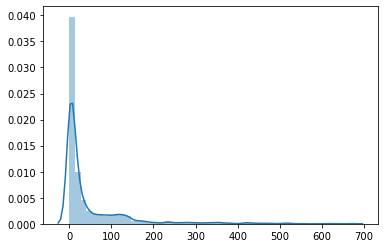

In [55]:
sns.distplot(bt_n)

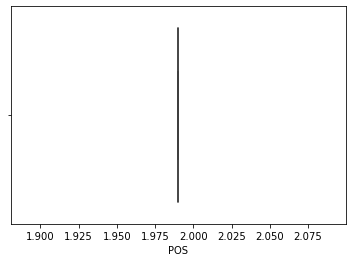

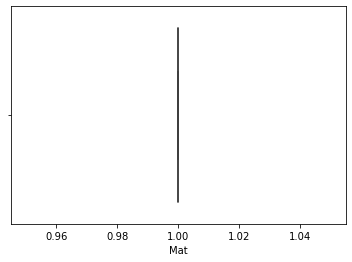

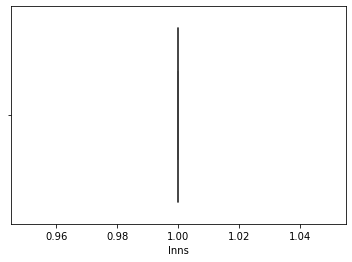

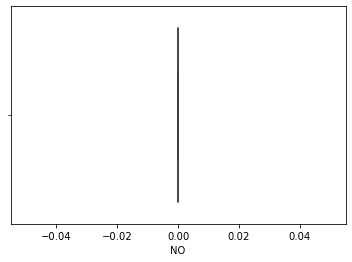

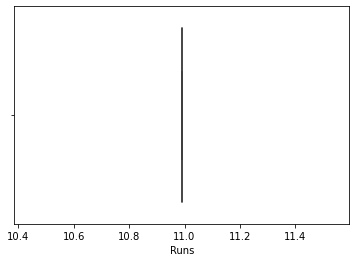

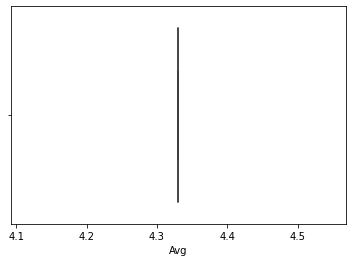

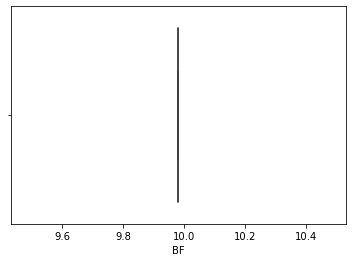

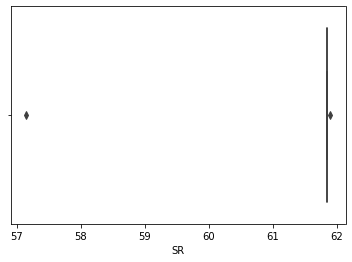

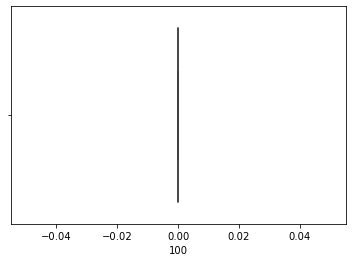

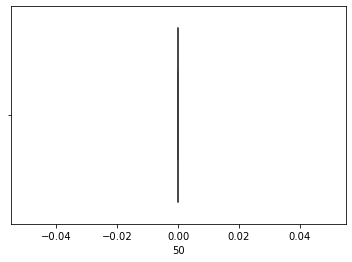

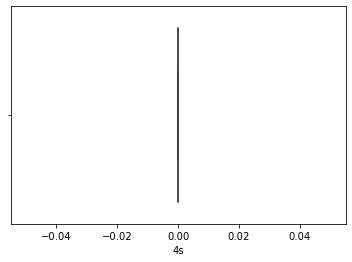

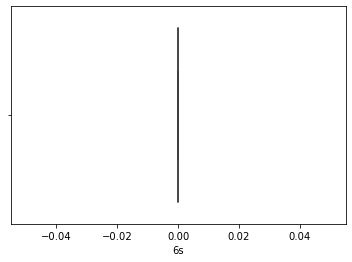

In [59]:
for i in bt_n.columns:
    sns.boxplot(bt_n[i])
    plt.show()

In [57]:
for i in bt_n.columns:
    q1=bt_n[i].quantile(0.25)
    q3=bt_n[i].quantile(0.75)
    iqr=q3-q1
    ub=q3+1.5*iqr
    lb=q1-1.5*iqr
    uc=bt_n[i].quantile(0.99)
    lc=bt_n[i].quantile(0.01)
    for j in bt_n[i].index:
        if bt_n.loc[j,i] >ub:
            bt_n.loc[j,i] =uc
        if bt_n.loc[j,i] >lb:
            bt_n.loc[j,i] =lc
            


C:\Users\Dhinakar\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-57-6f4b5a8602de>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bt_n.loc[j,i] =lc
<ipython-input-57-6f4b5a8602de>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bt_n.loc[j,i] =uc


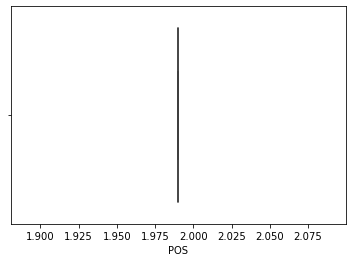

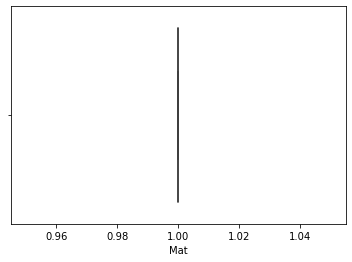

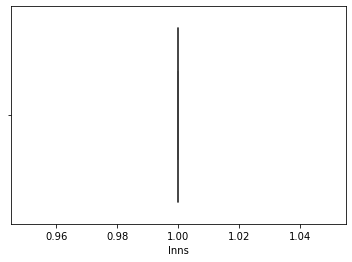

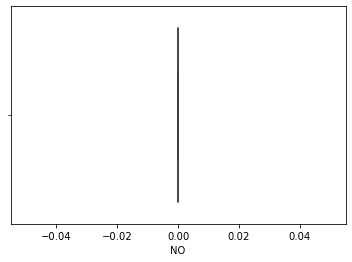

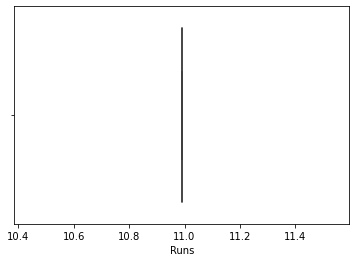

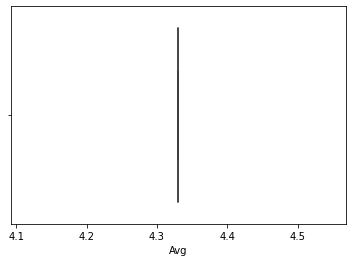

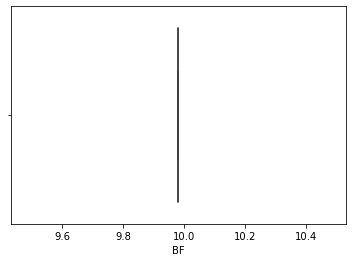

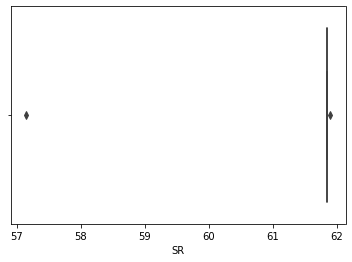

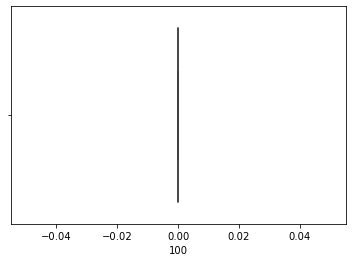

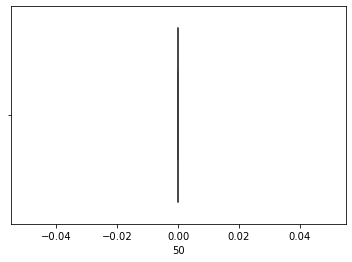

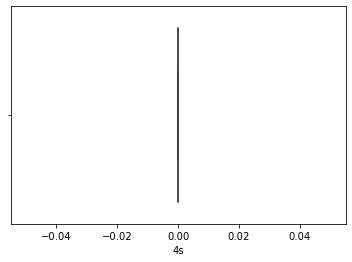

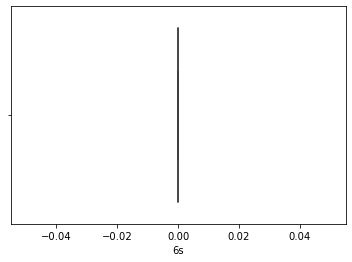

In [58]:
for i in bt_n.columns:
    sns.boxplot(bt_n[i])
    plt.show()